# HHA550_Diabetes Prediction Dataset

## Healtcare-dataset-diabetes-data


# IMPORTING Everthing

In [288]:
# Commands to install some of the libraries in-case if they are not installed
# Any other library that needs to be installed just use: !pip install <library name>
# !pip install seaborn
!pip3 install missingno
# !pip install xgboost
# !pip install catboost
# !pip install regex
# !pip install sklearn
# !pip install pandas
# !pip install numpy
!pip3 install imblearn
!pip install lightgbm
!pip3 install libomp

ERROR: Could not find a version that satisfies the requirement libomp (from versions: none)
ERROR: No matching distribution found for libomp


In [289]:
import pandas as pd   # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np   # linear algebra
import matplotlib.pyplot as plt  #graphs and plots
import seaborn as sns   #data visualizations 
import csv # Some extra functionalities for csv  files - reading it as a dictionary
from lightgbm import LGBMClassifier #sklearn is for machine learning and statistical modeling including classification, regression, clustering and dimensionality reduction 

from sklearn.model_selection import train_test_split, cross_validate   #break up dataset into train and test sets

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler


# importing python library for working with missing data
import missingno as msno
# To install missingno use: !pip install missingno
import re    # This library is used to perform regex pattern matching

# import various functions from sklearn
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import GradientBoostingClassifier
from catboost import CatBoostClassifier
import xgboost as xgb
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, classification_report, make_scorer
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split

Import additional items as needed...
We may not use them all in this course...

In [290]:
from sklearn.model_selection import KFold,cross_val_score, RepeatedStratifiedKFold,StratifiedKFold
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import OneHotEncoder,StandardScaler,PowerTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import KNNImputer,SimpleImputer
from sklearn.compose import make_column_transformer
from imblearn.pipeline import make_pipeline
from sklearn.svm import SVC
from sklearn.impute import SimpleImputer
from sklearn.dummy import DummyClassifier
from imblearn.over_sampling import SMOTE
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, balanced_accuracy_score,\
                            precision_score, recall_score, roc_auc_score,\
                            plot_confusion_matrix, classification_report, plot_roc_curve, f1_score

import plotly 
import plotly.express as px
import plotly.graph_objs as go
import plotly.offline as py
from plotly.offline import iplot
from plotly.subplots import make_subplots
import plotly.figure_factory as ff

import warnings
warnings.filterwarnings("ignore")

* If from imblearn.oversampling import SMOTE does not load use
    `conda install -c conda-forge imbalanced-learn`
* Then rerun
    `from imblearn.over_sampling import SMOTE`

# Exploratory Data Analysis (EDA)

## Start with Loading the CSV Data

In [291]:
#upload the csv and declare its name to = the csv
#for this course we will name the dataframe 'stroke', but you can change it to df or anything else you want.

#Find the file path to the .csv
    #Then use code below to read .csv

# stroke = pd.read_csv('x')
#for PC file path will use /  
         #Original PC file path 'C:\Users\kaden\Desktop\HHA550_Stroke_Data\healthcare-dataset-stroke-data.csv'
         #Change PC file path for Python to C:/Users/kaden/Desktop/Python_Diabetes Dataset/dataset_diabetes/diabetic_data.csv'
    #for MAC file path will use //
         #Original MAC file path 'C://Users//kaden//Desktop//HHA550_Stroke_Data//healthcare-dataset-stroke-data.csv'
         #Change MAC file path for Python to 'C://Users//kaden//Desktop//HHA550_Stroke_Data//healthcare-dataset-stroke-data.csv'

#for PC (running PC for this example)
# stroke = pd.read_csv('C:/Users/kaden/Desktop/HHA550_Stroke_Data/healthcare-dataset-stroke-data.csv')
diabetes = pd.read_csv('Data/cleaned_data.csv')

#for MAC
#stroke = pd.read_csv('C://Users//kaden//Desktop//HHA550_Stroke_Data//healthcare-dataset-stroke-data.csv')

#### Looking at the data
Now we will try to look at the some of the rows of the dataframe. If you need to see more than 5 lines of the dataframe you can use the parameter inside the 'head' function. 
Like: 'stroke.head(n = 10)'

In [292]:
#make sure csv has been assigned to declared name and can be read
diabetes.head()

# this command will give you the first 5 lines of the csv (0,1,2,3,4)

,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,medical_specialty,num_lab_procedures,...,tolazamide,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,802404,3,1,10,3,3,4,12,11,33,...,0,4,0,0,0,0,0,1,1,0
1,354556,3,1,5,1,3,7,7,11,60,...,0,3,0,0,0,0,0,1,1,0
2,815307,3,2,9,1,6,7,10,11,55,...,0,4,0,0,0,0,0,0,1,0
3,132187,3,1,6,1,1,7,3,3,29,...,0,0,0,0,0,0,0,0,1,0
4,195792,3,2,9,1,3,7,6,3,64,...,0,0,0,0,0,0,0,1,1,0


# Exploring and Understanding the Data


### Initial Insights
* That makes it a lot easier to compare the missing value percentages within the columns.
* In our dataset, we have both numerical and categorical variables.
* It is essential to see whether columns are correctly inferred.
* The most important one to look for is our target variable 'readmitted'
* 'readmitted' is detected as an integer, not as an object.
* Target variable is coded as 0 for no readmittance or readmittance over 30 days and 1 for readmittance within the 30 day mark
* choosing the right columns to take a look at is critical

**Note: In this case we do not need to know the exact missing percentage of the columns.**

# What are the current problems we have that need to be solved?
* We have many variables present.
* We make prediction on the target variable `readmitted`
* And we will build a model to get best prediction on the readmitted variable.

## Insights into our target variable
* One of the first steps of exploratory data analysis should always be to look at what the values of y look like.

In [293]:
y = diabetes['readmitted']
print(f'Percentage of patient that were readmitted within a 30 day period: % {round(y.value_counts(normalize=True)[1]*100,2)} --> ({y.value_counts()[1]} patient)\nPercentage of patient that were not readmitted within a 30 day period: % {round(y.value_counts(normalize=True)[0]*100,2)} --> ({y.value_counts()[0]} patient)')

Percentage of patient that were readmitted within a 30 day period: % 33.97 --> (16894 patient)
Percentage of patient that were not readmitted within a 30 day period: % 66.03 --> (32841 patient)


### So what does that all mean?
We have imbalanced data

* Almost 33% of the instances of our target variable are `readmitted within 30 days`
* 17329 patients have been readmitted within 30 days
* 66% of the instances of our target variable are `not readmitted within 30 days`
* 34488 patient have not been readmitted within the given criteria.

### Visualize readmittance

In [294]:
fig = px.histogram(diabetes, x="readmitted", title='readmitted', width=400, height=400)
fig.show()
# 0 = not readmitted
# 1 = readmitted

## Data Imbalance

* Instances across classes are imbalanced, like in our dataset, we have imbalance data.

* The problem is, most of the machine learning algorithm do not work well with the imbalanced data.

* Some of the metrics (like accuracy) give us misleading results.

* Most of the time in classification problems our interest is to get better predict on the minority class.

* In our example: People were readmitted within 30 days is minority class.

* Otherwise our machine learning algorithm falsely predicts majority class.

* In our example: no readmittance within 30 days is majority class

## Decide on Metrics

* This is the first step when approaching a machine learning problem: decide the metric!

* The choice of the wrong metric can mean choosing the wrong algorithm.

* We see that the target is skewed and thus the best metric for this binary classification problem would be Area Under the ROC Curve (AUC).

* We can use precision and recall too, but AUC combines these two metrics.

* We have already seen the label/target distribution, and we know that it is a binary classification problem with skewed targets. Thus, we will be using StratifiedKFold to split the data

* Just for further info, it is not advisable to use accuracy as an evaluation metric, when dealing with higly imbalanced data

In [295]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49735 entries, 0 to 49734
Data columns (total 45 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   patient_nbr               49735 non-null  int64 
 1   race                      49735 non-null  int64 
 2   gender                    49735 non-null  int64 
 3   age                       49735 non-null  int64 
 4   admission_type_id         49735 non-null  int64 
 5   discharge_disposition_id  49735 non-null  int64 
 6   admission_source_id       49735 non-null  int64 
 7   time_in_hospital          49735 non-null  int64 
 8   medical_specialty         49735 non-null  int64 
 9   num_lab_procedures        49735 non-null  int64 
 10  num_procedures            49735 non-null  int64 
 11  num_medications           49735 non-null  int64 
 12  number_outpatient         49735 non-null  int64 
 13  number_emergency          49735 non-null  int64 
 14  number_inpatient      

### Check for Missing Data / Missing Values

In [296]:
def missing (diabetes):
    missing_number = diabetes.isnull().sum().sort_values(ascending=False)
    missing_percent = (diabetes.isnull().sum()/diabetes.isnull().count()).sort_values(ascending=False)
    missing_values = pd.concat([missing_number, missing_percent], axis=1, keys=['Missing_Number', 'Missing_Percent'])
    return missing_values

missing(diabetes)

,Missing_Number,Missing_Percent
patient_nbr,0,0.0
nateglinide,0,0.0
glimepiride,0,0.0
acetohexamide,0,0.0
glipizide,0,0.0
glyburide,0,0.0
tolbutamide,0,0.0
pioglitazone,0,0.0
rosiglitazone,0,0.0
acarbose,0,0.0


<AxesSubplot:>

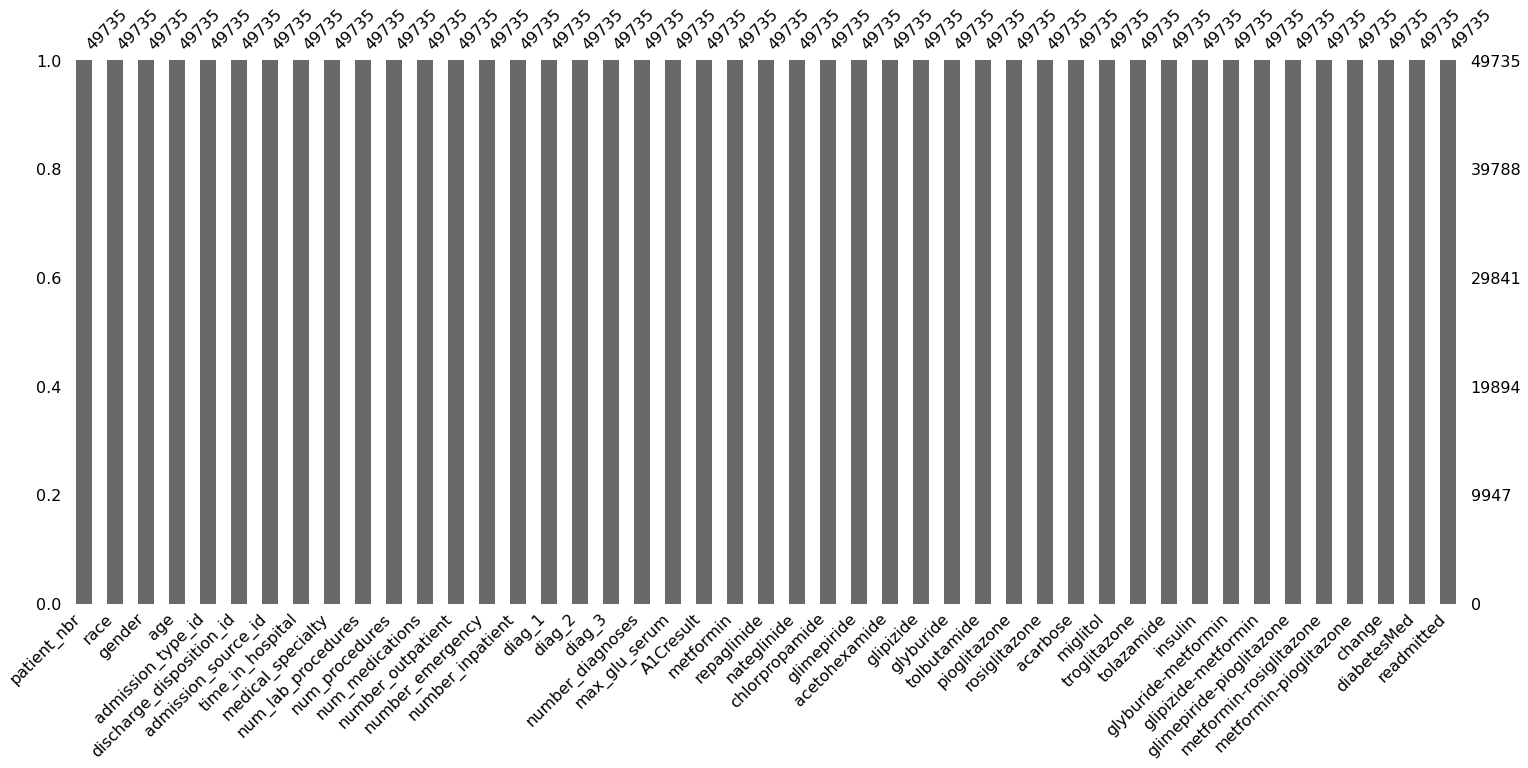

In [297]:
# Visualizing the missing data to get more idea
msno.bar(diabetes)

<AxesSubplot:>

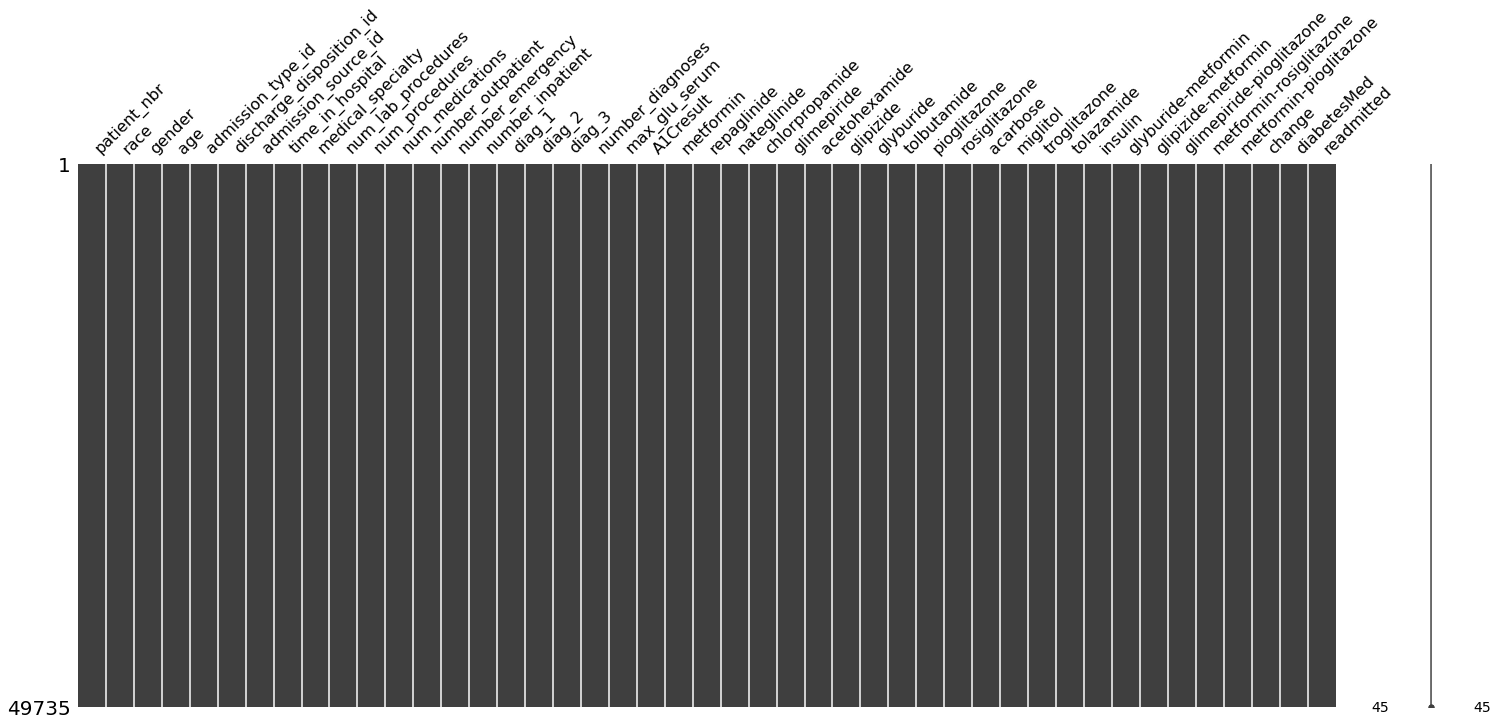

In [298]:
#another way to vizualize missing values
msno.matrix(diabetes)

# Numerical Features
* Look at the data elements (columns) using `diabetes.head()`
* Look at the Dtype (data type) using `diabetes.info()`

In [299]:
diabetes.head()

,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,medical_specialty,num_lab_procedures,...,tolazamide,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,802404,3,1,10,3,3,4,12,11,33,...,0,4,0,0,0,0,0,1,1,0
1,354556,3,1,5,1,3,7,7,11,60,...,0,3,0,0,0,0,0,1,1,0
2,815307,3,2,9,1,6,7,10,11,55,...,0,4,0,0,0,0,0,0,1,0
3,132187,3,1,6,1,1,7,3,3,29,...,0,0,0,0,0,0,0,0,1,0
4,195792,3,2,9,1,3,7,6,3,64,...,0,0,0,0,0,0,0,1,1,0


In [300]:
diabetes['A1Cresult'].info()
diabetes['A1Cresult'].astype('int64')

<class 'pandas.core.series.Series'>
RangeIndex: 49735 entries, 0 to 49734
Series name: A1Cresult
Non-Null Count  Dtype
--------------  -----
49735 non-null  int64
dtypes: int64(1)
memory usage: 388.7 KB


0        0
1        0
2        0
3        0
4        5
        ..
49730    4
49731    0
49732    5
49733    4
49734    0
Name: A1Cresult, Length: 49735, dtype: int64

### Skewness

In [301]:
diabetes.skew()

patient_nbr                  -0.001583
race                          7.574328
gender                      218.925531
age                          -0.566065
admission_type_id             1.419381
discharge_disposition_id      2.881316
admission_source_id           1.069910
time_in_hospital              1.105799
medical_specialty            48.560517
num_lab_procedures           -0.183722
num_procedures                1.190355
num_medications               1.427425
number_outpatient             8.955944
number_emergency             24.940112
number_inpatient              3.601214
number_diagnoses             -0.593733
A1Cresult                     1.790144
metformin                     1.581991
repaglinide                   6.761140
nateglinide                  10.961250
chlorpropamide               34.633092
glimepiride                   3.797821
acetohexamide                 0.000000
glipizide                     2.236351
glyburide                     2.788567
tolbutamide              

### Univariate Analysis

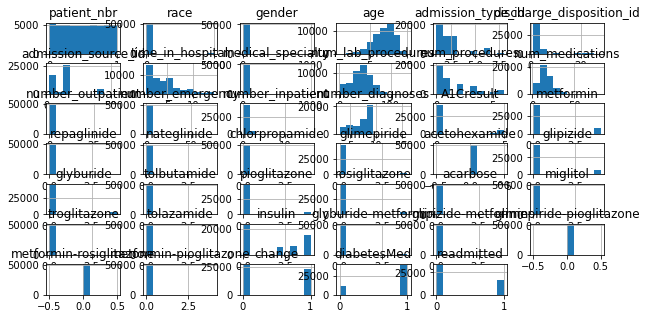

In [302]:
diabetes.hist(figsize=(10,5));

* As seen in both skewness result and histograms, numerical features have skewness in different degrees
* We will deal with different scale and skewness during the modeling by using standardization `Standard scaler`

# Bivariate Analysis

### Race & Readmittance

In [303]:
print (f'A person with whos black1 has a probability of {round(diabetes[diabetes["race"]==1]["readmitted"].mean()*100,2)} % of being readmitted')

print()


A person with whos black1 has a probability of 32.97 % of being readmitted



In [304]:
fig = px.histogram(diabetes, x="readmitted", color="race",width=600, height=400)
fig.show()

### Gender & Readmittance

In [305]:
#histogram displaying the relationship between gender adn readmittance with 30 days
fig = px.histogram(diabetes, x="readmitted", color="gender",width=600, height=600)
fig.show()

## Metrics of Importance

* The degree of dependency between a categorical variable and the target variable can be measured by using a mutual info score
* Higher values of mutual information mean a higher degree of dependence
* A higher mutual info score implies that we can get a better prediction on the target variable

* As seen above, most of the categorical variables have almost no effect on the target variable.
* It would be a good exercise to see the differences on the model between with and without the some of the categorical variables. For the sake of the first study, we will keep the categorical variables in the model

### Correlation Matrix & Scatter Plots

In [306]:
diabetes.corr()
# admittion_type .04
#admittion source .5
# nateniglide .09
#number outpaitent
#numbr emergency
# time in hospital

,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,medical_specialty,num_lab_procedures,...,tolazamide,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
patient_nbr,1.000000,-0.002162,-0.006321,-0.001328,-0.003088,-0.003219,0.004253,0.003556,-0.002274,0.006143,...,0.004861,0.004397,0.001050,0.001754,NaN,NaN,-0.006660,0.008264,0.003020,-0.003172
race,-0.002162,1.000000,0.036541,-0.023314,0.011420,-0.012408,0.004003,-0.000801,-0.009197,0.002434,...,-0.002407,-0.006420,0.031394,-0.000567,NaN,NaN,-0.000567,0.021827,0.013562,-0.011857
gender,-0.006321,0.036541,1.000000,-0.002946,0.004712,-0.005058,-0.004389,-0.009022,-0.002158,-0.009372,...,0.000691,-0.006032,-0.000830,0.000519,NaN,NaN,-0.000477,0.005422,0.003442,-0.004900
age,-0.001328,-0.023314,-0.002946,1.000000,0.012986,0.108213,0.049981,0.112180,-0.022693,0.007961,...,0.006131,-0.072047,-0.001199,0.002656,NaN,NaN,-0.000183,-0.028969,-0.025278,0.012893
admission_type_id,-0.003088,0.011420,0.004712,0.012986,1.000000,0.152553,0.220900,-0.028160,0.056453,-0.134670,...,0.017406,-0.102348,0.003509,-0.003787,NaN,NaN,0.002132,-0.024127,-0.037059,0.036363
discharge_disposition_id,-0.003219,-0.012408,-0.005058,0.108213,0.152553,1.000000,0.019039,0.156456,0.030675,-0.007232,...,-0.002342,-0.021975,0.001268,0.002234,NaN,NaN,-0.000364,0.001097,-0.005364,-0.032341
admission_source_id,0.004253,0.004003,-0.004389,0.049981,0.220900,0.019039,1.000000,-0.005611,-0.086601,0.080399,...,0.005792,-0.010263,-0.031588,0.001405,NaN,NaN,-0.004715,0.012721,0.004961,0.050171
time_in_hospital,0.003556,-0.000801,-0.009022,0.112180,-0.028160,0.156456,-0.005611,1.000000,0.028108,0.285865,...,-0.010177,0.109185,0.000006,0.000853,NaN,NaN,0.002339,0.126031,0.089501,0.030038
medical_specialty,-0.002274,-0.009197,-0.002158,-0.022693,0.056453,0.030675,-0.086601,0.028108,1.000000,-0.064176,...,-0.001064,-0.016965,-0.000702,0.000924,NaN,NaN,0.003753,-0.006860,-0.011961,-0.018452
num_lab_procedures,0.006143,0.002434,-0.009372,0.007961,-0.134670,-0.007232,0.080399,0.285865,-0.064176,1.000000,...,-0.002042,0.107887,-0.021872,-0.003196,NaN,NaN,-0.004566,0.062889,0.043884,0.015256


There is a very small positive correlation between numerical features.
Let us see their mean scores with the target variable

In [307]:
diabetes.mean()

patient_nbr                 499477.818337
race                            19.085754
gender                           1.478838
age                              7.064602
admission_type_id                2.279702
discharge_disposition_id         3.420328
admission_source_id              5.622921
time_in_hospital                 4.425636
medical_specialty               12.735699
num_lab_procedures              42.991334
num_procedures                   1.457686
num_medications                 15.899548
number_outpatient                0.254207
number_emergency                 0.210858
number_inpatient                 0.644737
number_diagnoses                 7.233498
A1Cresult                        0.808807
metformin                        0.757052
repaglinide                      0.081894
nateglinide                      0.032452
chlorpropamide                   0.003318
glimepiride                      0.229335
acetohexamide                    0.000000
glipizide                        0

In [308]:
diabetes[['admission_type_id','diabetesMed','admission_source_id', 'insulin', 'A1Cresult', 'nateglinide', 
          'number_emergency', 'number_outpatient', 'readmitted']].corr()

,admission_type_id,diabetesMed,admission_source_id,insulin,A1Cresult,nateglinide,number_emergency,number_outpatient,readmitted
admission_type_id,1.000000,-0.037059,0.220900,-0.102348,-0.069623,-0.012914,-0.020063,0.068682,0.036363
diabetesMed,-0.037059,1.000000,0.004961,0.546688,0.080524,0.048387,0.039797,0.024276,0.049064
admission_source_id,0.220900,0.004961,1.000000,-0.010263,0.017986,-0.017324,0.057098,0.056254,0.050171
insulin,-0.102348,0.546688,-0.010263,1.000000,0.097817,0.001911,0.030026,-0.004672,0.017201
A1Cresult,-0.069623,0.080524,0.017986,0.097817,1.000000,0.001902,-0.012760,-0.040965,-0.006935
nateglinide,-0.012914,0.048387,-0.017324,0.001911,0.001902,1.000000,0.006151,0.010267,0.009246
number_emergency,-0.020063,0.039797,0.057098,0.030026,-0.012760,0.006151,1.000000,0.079351,0.061461
number_outpatient,0.068682,0.024276,0.056254,-0.004672,-0.040965,0.010267,0.079351,1.000000,0.068666
readmitted,0.036363,0.049064,0.050171,0.017201,-0.006935,0.009246,0.061461,0.068666,1.000000


In [309]:
diabetes.groupby('readmitted').mean()

,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,medical_specialty,num_lab_procedures,...,troglitazone,tolazamide,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed
readmitted,,,,,,,,,,,,,,,,,,,,,
0,500137.961968,20.167413,1.494656,7.049998,2.240188,3.540422,5.464724,4.360616,12.945434,42.776529,...,0.000000,0.001705,1.795956,0.025943,0.000122,0.0,0.0,0.000122,0.455528,0.764593
1,498194.535693,16.983071,1.448088,7.092992,2.356517,3.186871,5.930449,4.552030,12.327986,43.408903,...,0.000474,0.000710,1.860246,0.030188,0.000000,0.0,0.0,0.000000,0.496685,0.807565


# Clean the Data (Feature Engineering)

## There are two options for cleaning this data.  
       1) Cleaning the .csv in Excel
       2) Cleaning the data in Python/Jupyter Notebook
              (We will show how to clean the data in the Notebook)
              
## You may skip this step if you clean your dataset in the .csv document
        (see healthcare-dataset-stroke-data(clean_dataset).csv

### What data are we going to do?
### 1) Drop unnecessary data
### 2) Check for duplicates
### 3) Check for missing data

### Step 1: Drop the columns that are either missing most of the times or are not relevant
* The `id` is an identifier to uniquely identify the visit of a patient in a hospital. Each of the rows are individual instances. Also, there is no importance of this variable from prediction point to of view and hence it would be wise to drop this too.

### Step 2: Check for duplicates or "dups"
* The `id` is an identifier to uniquely identify the visit of a patient in a hospital.  Lets confirm that there are not duplicate records for `id` or any others.
* We are hoping to see a value of zero "0"

In [310]:
diabetes.duplicated().sum()

0

Confirmed the value of zero "0"

### Step 3: Check for missing data

In [311]:
#lets understand the data a bit
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49735 entries, 0 to 49734
Data columns (total 45 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   patient_nbr               49735 non-null  int64 
 1   race                      49735 non-null  int64 
 2   gender                    49735 non-null  int64 
 3   age                       49735 non-null  int64 
 4   admission_type_id         49735 non-null  int64 
 5   discharge_disposition_id  49735 non-null  int64 
 6   admission_source_id       49735 non-null  int64 
 7   time_in_hospital          49735 non-null  int64 
 8   medical_specialty         49735 non-null  int64 
 9   num_lab_procedures        49735 non-null  int64 
 10  num_procedures            49735 non-null  int64 
 11  num_medications           49735 non-null  int64 
 12  number_outpatient         49735 non-null  int64 
 13  number_emergency          49735 non-null  int64 
 14  number_inpatient      

From briefly, looking through the data columns, we can see there are some identification columns, some numerical columns, some categorical (free-text) columns. These columns will be described in more detail below.

In [312]:
# list all of the columns in the dataframe
diabetes.columns

Index(['patient_nbr', 'race', 'gender', 'age', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'time_in_hospital',
       'medical_specialty', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_outpatient', 'number_emergency',
       'number_inpatient', 'diag_1', 'diag_2', 'diag_3', 'number_diagnoses',
       'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide', 'nateglinide',
       'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide',
       'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose',
       'miglitol', 'troglitazone', 'tolazamide', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

In [313]:
# Dropping the columns which are not required
diabetes.drop(['patient_nbr', 'race', 'gender', 'age',
               'discharge_disposition_id', 'time_in_hospital',
               'medical_specialty', 'num_lab_procedures', 'num_procedures',
               'num_medications','number_inpatient', 'diag_1', 'diag_2', 
               'diag_3', 'number_diagnoses','max_glu_serum', 'metformin', 'repaglinide',
               'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide',
               'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose',
               'miglitol', 'troglitazone', 'tolazamide', 'insulin',
               'glyburide-metformin', 'glipizide-metformin',
               'glimepiride-pioglitazone', 'metformin-rosiglitazone',
               'metformin-pioglitazone', 'change', 'diabetesMed'], axis = 1, inplace = True)

In [314]:
diabetes.head()

,admission_type_id,admission_source_id,number_outpatient,number_emergency,A1Cresult,nateglinide,readmitted
0,3,4,0,0,0,0,0
1,1,7,0,1,0,0,0
2,1,7,0,0,0,0,0
3,1,7,0,0,0,0,0
4,1,7,0,0,5,0,0


<AxesSubplot:>

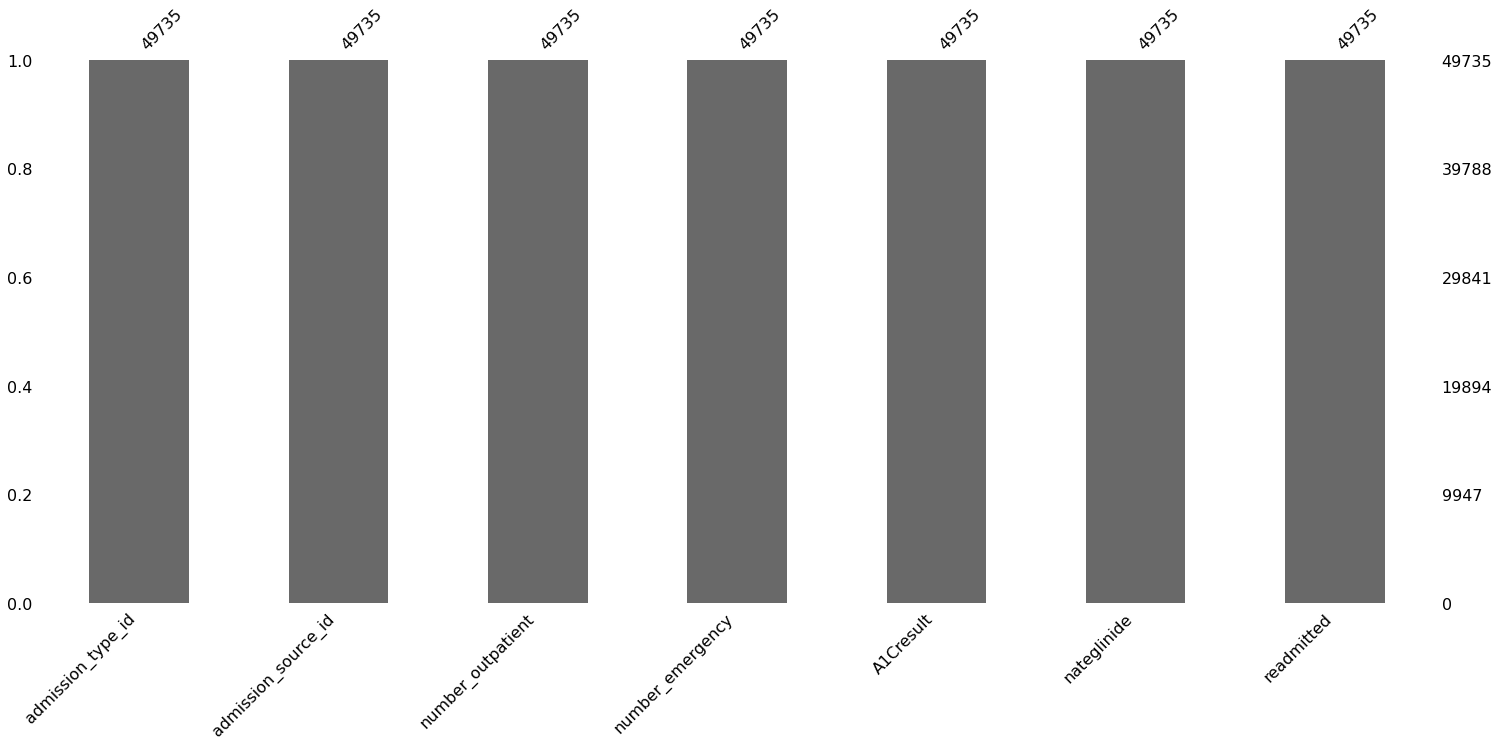

In [315]:
# visualizing missing data
msno.bar(diabetes)

## Converting Categroical Features into Numeric Features

# Breaking the data up into Train & Test

In [316]:
train_df, valid_df, test_df = np.split(diabetes.sample(frac=1, random_state=42), 
                                       [int(.7*len(diabetes)), int(0.85*len(diabetes))])
train_df = train_df.reset_index(drop = True)
valid_df = valid_df.reset_index(drop = True)
test_df = test_df.reset_index(drop = True)

In [317]:
diabetes.readmitted.value_counts()

0    32841
1    16894
Name: readmitted, dtype: int64

In [318]:
train_df.readmitted.value_counts()

0    22942
1    11872
Name: readmitted, dtype: int64

In [319]:
valid_df.readmitted.value_counts()

0    4983
1    2477
Name: readmitted, dtype: int64

In [320]:
test_df.readmitted.value_counts()

0    4916
1    2545
Name: readmitted, dtype: int64

# Treating the Imbalance in the Data

Imbalance in the data means that one of the classes in the data is too less as compared to the others. Typically, it is better to balance the data in some way to give the positives more weight. There are 3 strategies that are typically utilized:

* Sub-sample the more dominant class: use a random subset of the negatives
* Over-sample the imbalanced class: use the same positive samples multiple times
* Create synthetic positive data

Usually, you will want to use the latter two methods if you only have a handful of positive cases. Since we have a few thousand positive cases, let's use the sub-sample approach. Here, we will create a balanced training data set that has 50% positive and 50% negative. You can also play with this ratio to see if you can get an improvement.

In [321]:
def calc_prevalence(y_actual):
    
    '''
    This function is to understand the ratio/distribution of the classes that we are going to predict for.
    
    Params:
    1. y_actual: The target feature
    
    Return:
    1. (sum(y_actual)/len(y_actual)): The ratio of the postive class in the comlpete data.
    '''
    
    return (sum(y_actual)/len(y_actual))

In [322]:
# split the training data into positive and negative
rows_pos = train_df.readmitted == 1
df_train_pos = train_df.loc[rows_pos]
df_train_neg = train_df.loc[~rows_pos]

# merge the balanced data
diabetes_df_balanced = pd.concat([df_train_pos, df_train_neg.sample(n = len(df_train_pos), random_state = 111)],axis = 0)

# shuffle the order of training samples 
diabetes_df_balanced = diabetes_df_balanced.sample(n = len(diabetes_df_balanced), random_state = 42).reset_index(drop = True)

print('Train balanced prevalence(n = %d):%.3f'%(len(diabetes_df_balanced), \
                                                calc_prevalence(diabetes_df_balanced.readmitted.values)))

Train balanced prevalence(n = 23744):0.500


In [323]:
diabetes_df_balanced.readmitted.value_counts()

0    11872
1    11872
Name: readmitted, dtype: int64

In [328]:
X_train = diabetes_df_balanced.drop('readmitted',axis=1)

y_train = diabetes_df_balanced['readmitted']

X_valid = valid_df.drop('readmitted',axis=1)

y_valid = valid_df['readmitted']

X_test = test_df.drop('readmitted',axis=1)

y_test = test_df['readmitted']

In [329]:
X_train.columns

Index(['admission_type_id', 'admission_source_id', 'number_outpatient',
       'number_emergency', 'A1Cresult', 'nateglinide'],
      dtype='object')

In [330]:
X_valid.columns

Index(['admission_type_id', 'admission_source_id', 'number_outpatient',
       'number_emergency', 'A1Cresult', 'nateglinide'],
      dtype='object')

In [331]:
X_test.columns

Index(['admission_type_id', 'admission_source_id', 'number_outpatient',
       'number_emergency', 'A1Cresult', 'nateglinide'],
      dtype='object')

In [332]:
scaler=StandardScaler()
X_train[['admission_type_id', 'admission_source_id', 'number_outpatient','number_emergency', 'A1Cresult', 'nateglinide']] = pd.DataFrame(scaler.fit_transform(X_train[['admission_type_id', 'admission_source_id', 'number_outpatient','number_emergency', 'A1Cresult', 'nateglinide']]),columns=['admission_type_id', 'admission_source_id', 'number_outpatient','number_emergency', 'A1Cresult', 'nateglinide'])
X_valid[['admission_type_id', 'admission_source_id', 'number_outpatient','number_emergency', 'A1Cresult', 'nateglinide']] = pd.DataFrame(scaler.transform(X_valid[['admission_type_id', 'admission_source_id', 'number_outpatient','number_emergency', 'A1Cresult', 'nateglinide']]),columns=['admission_type_id', 'admission_source_id', 'number_outpatient','number_emergency', 'A1Cresult', 'nateglinide'])
X_test[['admission_type_id', 'admission_source_id', 'number_outpatient','number_emergency', 'A1Cresult', 'nateglinide']] = pd.DataFrame(scaler.transform(X_test[['admission_type_id', 'admission_source_id', 'number_outpatient','number_emergency', 'A1Cresult', 'nateglinide']]),columns=['admission_type_id', 'admission_source_id', 'number_outpatient','number_emergency', 'A1Cresult', 'nateglinide'])

# Creating and Understanding Models

In [333]:
def calc_specificity(y_actual, y_pred, thresh):
    # calculates specificity
    return sum((y_pred < thresh) & (y_actual == 0)) /sum(y_actual ==0)

def print_report(y_actual, y_pred, thresh = 0.5):
    
    '''
    This function calculates all the metrics to asses the machine learning models.
    
    Params:
    1. y_actual: The actual values for the target variable.
    2. y_pred: The predicted values for the target variable.
    3. thresh: The threshold for the probability to be considered as a positive class. Default value 0.5
    
    Return:
    1. AUC
    2. Accuracy
    3. Recall
    4. Precision
    5. Specificity
    '''
    
    auc = roc_auc_score(y_actual, y_pred)
    accuracy = accuracy_score(y_actual, (y_pred > thresh))
    recall = recall_score(y_actual, (y_pred > thresh))
    precision = precision_score(y_actual, (y_pred > thresh))
    specificity = calc_specificity(y_actual, y_pred, thresh)
    print('AUC:%.3f'%auc)
    print('accuracy:%.3f'%accuracy)
    print('recall:%.3f'%recall)
    print('precision:%.3f'%precision)
    print('specificity:%.3f'%specificity)
    print('prevalence:%.3f'%calc_prevalence(y_actual))
    print(' ')
    return auc, accuracy, recall, precision, specificity

## Linear Regression

In [334]:
lnr = LinearRegression()
lnr.fit(X_train, y_train)


y_valid_preds = lnr.predict(X_valid)

In [335]:
y_valid_preds

array([0.55366726, 0.47601202, 0.49027644, ..., 0.47220731, 0.47220731,
       0.47601202])

## Logistic Regression

In [336]:
lr=LogisticRegression(random_state = 42, solver = 'newton-cg', max_iter = 200)
lr.fit(X_train, y_train)

y_valid_preds = lr.predict_proba(X_valid)[:,1]

print('Metrics for Validation data:')

lr_valid_auc, lr_valid_accuracy, lr_valid_recall, \
    lr_valid_precision, lr_valid_specificity = print_report(y_valid,y_valid_preds, 0.5)

Metrics for Validation data:
AUC:0.566
accuracy:0.617
recall:0.349
precision:0.410
specificity:0.750
prevalence:0.332
 


## Explaining Results

#### AUC (area under the curve)
* values 0 to 1
* higher the AUC (closer to "1"), the better the performace of the model at distinguishing between the positive and negative clases.

#### Precision
* ratio between the correct predecitions and the total predicitons
* indicates how good is the model at watever it predicts

#### Recall
* (Sensitivity)
* Precision = TP/TP+F 
* Precision is the ratio of correctly predicted positive observations to the total predicted positive observations

#### f1-score 
* F1 Score = 2*(Recall * Precision) / (Recall + Precision)
* is the weighted average of Precision and Recall. Therefore, this score takes both false positives and false negatives into account. Intuitively it is not as easy to understand as accuracy, but F1 is usually more useful than accuracy

#### Support
* positive counts (values)

#### Accuracy
* how close a measurement is to the true value
* Accuracy = TP+TN/TP+FP+FN+TN
* is simply a ratio of correctly predicted observation to the total observations.

#### Macro avg
* all classes equally contribute to the final averaged metric

#### Weighted avg
* each classes’s contribution to the average is weighted by its size

#### Important Insights into Results
* If on average, your measurements for a given substance are close to the known value, but the measurements are far from each other, then you have accuracy without precision
* Which is better accuracy or precision?
** Accuracy is something you can fix in future measurements. Precision is more important in calculations. When using a measured value in a calculation, you can only be as precise as your least precise measurement
* Is precision more important than recall?
** Recall is more important where Overlooked Cases (False Negatives) are more costly than False Alarms (False Positive). Precision is more important where False Alarms (False Positives) are more costly than Overlooked Cases (False Negatives). The focus in these problems is in weeding out the negative cases.
* F1 Score might be a better measure to use if we need to seek a balance between Precision and Recall AND there is an uneven class distribution (large number of Actual Negatives).


#### Helpful Links
* https://towardsdatascience.com/choosing-performance-metrics-61b40819eae1#:~:text=The%20macro%20average%20precision%20is,less%20in%20the%20weighted%20average. 
* https://towardsdatascience.com/accuracy-precision-recall-or-f1-331fb37c5cb9 
* https://www.mariakhalusova.com/posts/2019-04-17-ml-model-evaluation-metrics-p2/#:~:text=Micro%2Daveraged%3A%20all%20samples%20equally,is%20weighted%20by%20its%20size

### Summary of Results (what is the most important?)
#### Logistic Regression vs Linear Regression results
* As per our use case we need the results to be classes i.e. Stroke or No-Stroke for which we need a model that works on classification.
* Using the Linear Regression as seen above is not giving us the results as 0 or 1 instead it is giving us the results in numerical form. The internal logic of linear regression does not work output the probability it just tries to get the output as close to the target in the training data. Whereas the logistic regression model works on probability principle.
* Linear regression would try to fit the data if it can be fit using straight line. If we just use regression then it can try to fit a curved surface too. Whereas the graph of Logistic regression takes the shape of a sigmoid. See the pictures below.

<p>
<img src = "LinearRegression.PNG">
</p>

<b><center>Analytics Vidhya - Fig.1 - Linear Regression Example</center></b>

<p>
<img src = "LogisticRegression.PNG">
</p>

<b><center>Analytics Vidhya - Fig.2 - Logistic Regression Example</center></b>

Lets look at some other models to see if we get better results.

## KNN Model

In [338]:
knn = KNeighborsClassifier(n_neighbors = 100)
knn.fit(X_train, y_train)

knn_preds = knn.predict_proba(X_valid)[:,1]

lr_valid_auc, lr_valid_accuracy, lr_valid_recall, \
    lr_valid_precision, lr_valid_specificity = print_report(y_valid,knn_preds, 0.5)

AUC:0.570
accuracy:0.510
recall:0.637
precision:0.364
specificity:0.426
prevalence:0.332
 


## Stochastic Gradient Descent Model

In [339]:
sgdc=SGDClassifier(loss = 'log',alpha = 0.1,random_state = 42)
sgdc.fit(X_train, y_train)

sgd_preds = sgdc.predict_proba(X_valid)[:,1]

print('Stochastic Gradient Descent')
print('Validation:')
sgdc_valid_auc, sgdc_valid_accuracy, sgdc_valid_recall, \
                sgdc_valid_precision, sgdc_valid_specificity = print_report(y_valid,sgd_preds, 0.5)

Stochastic Gradient Descent
Validation:
AUC:0.565
accuracy:0.616
recall:0.347
precision:0.408
specificity:0.750
prevalence:0.332
 


## Decision Tree

In [340]:
dc_clf = DecisionTreeClassifier(random_state=42, max_depth = 10)
dc_clf.fit(X_train, y_train)

dc_preds_proba = dc_clf.predict_proba(X_valid)[:,1]
dc_preds = dc_clf.predict(X_valid)

lr_valid_auc, lr_valid_accuracy, lr_valid_recall, \
    lr_valid_precision, lr_valid_specificity = print_report(y_valid,dc_preds_proba, 0.5)

AUC:0.576
accuracy:0.612
recall:0.391
precision:0.411
specificity:0.713
prevalence:0.332
 


## Random Forest

In [341]:
rf_clf = RandomForestClassifier(random_state=111, max_depth = 6)

rf_clf.fit(X_train, y_train)

rf_preds = rf_clf.predict(X_valid)
rf_preds_proba = rf_clf.predict_proba(X_valid)[:, 1]

lr_valid_auc, lr_valid_accuracy, lr_valid_recall, \
    lr_valid_precision, lr_valid_specificity = print_report(y_valid,rf_preds_proba, 0.5)

AUC:0.579
accuracy:0.598
recall:0.447
precision:0.404
specificity:0.673
prevalence:0.332
 


## Linear SVC

In [342]:
lsvc_clf = LinearSVC(random_state=111)
lsvc_clf.fit(X_train, y_train)

lsvc_preds = lsvc_clf.decision_function(X_valid)

lr_valid_auc, lr_valid_accuracy, lr_valid_recall, \
    lr_valid_precision, lr_valid_specificity = print_report(y_valid,lsvc_preds, 0.5)

AUC:0.566
accuracy:0.668
recall:0.006
precision:0.533
specificity:0.997
prevalence:0.332
 


## Gradient Boosting Model

In [343]:
gb_clf = GradientBoostingClassifier(n_estimators = 100, criterion='friedman_mse', learning_rate = 1.0, max_depth = 3,\
                                    random_state = 111)

gb_clf.fit(X_train, y_train)
gb_preds = gb_clf.predict(X_valid)
gb_preds_proba = gb_clf.predict_proba(X_valid)[:, 1]

lr_valid_auc, lr_valid_accuracy, lr_valid_recall, \
    lr_valid_precision, lr_valid_specificity = print_report(y_valid,gb_preds_proba, 0.5)

AUC:0.577
accuracy:0.609
recall:0.414
precision:0.411
specificity:0.706
prevalence:0.332
 


## XGB Model

In [344]:
xgb_clf = xgb.XGBClassifier(max_depth=3, learning_rate = 1.0, use_label_encoder = False,\
                            eval_metric = 'logloss')
xgb_clf.fit(X_train, y_train)

xgb_preds = xgb_clf.predict(X_valid)
xgb_preds_proba = xgb_clf.predict_proba(X_valid)[:, 1]

lr_valid_auc, lr_valid_accuracy, lr_valid_recall, \
    lr_valid_precision, lr_valid_specificity = print_report(y_valid,xgb_preds_proba, 0.5)

AUC:0.579
accuracy:0.606
recall:0.426
precision:0.410
specificity:0.695
prevalence:0.332
 


## Catboost Model

In [345]:
catb=CatBoostClassifier(iterations=200, depth=3, learning_rate=1.0, random_state = 111)
catb.fit(X_train, y_train)
catb_preds = catb.predict_proba(X_valid)[:, 1]

lr_valid_auc, lr_valid_accuracy, lr_valid_recall, \
    lr_valid_precision, lr_valid_specificity = print_report(y_valid,catb_preds, 0.5)

0:	learn: 0.6845880	total: 70.5ms	remaining: 14s
1:	learn: 0.6824239	total: 87.1ms	remaining: 8.62s
2:	learn: 0.6820287	total: 101ms	remaining: 6.61s
3:	learn: 0.6809673	total: 108ms	remaining: 5.28s
4:	learn: 0.6806335	total: 117ms	remaining: 4.57s
5:	learn: 0.6804716	total: 124ms	remaining: 4s
6:	learn: 0.6803387	total: 132ms	remaining: 3.63s
7:	learn: 0.6799189	total: 140ms	remaining: 3.35s
8:	learn: 0.6798865	total: 149ms	remaining: 3.16s
9:	learn: 0.6795792	total: 158ms	remaining: 3.01s
10:	learn: 0.6795662	total: 164ms	remaining: 2.82s
11:	learn: 0.6794450	total: 171ms	remaining: 2.68s
12:	learn: 0.6792435	total: 178ms	remaining: 2.56s
13:	learn: 0.6791830	total: 183ms	remaining: 2.43s
14:	learn: 0.6790625	total: 190ms	remaining: 2.34s
15:	learn: 0.6789597	total: 196ms	remaining: 2.25s
16:	learn: 0.6788706	total: 205ms	remaining: 2.2s
17:	learn: 0.6788288	total: 212ms	remaining: 2.15s
18:	learn: 0.6784519	total: 220ms	remaining: 2.1s
19:	learn: 0.6783423	total: 226ms	remaining: 2

# Hyper Parameter Tuning

* From the above models we will choose two models for demonstration i.e. Random Forest, Decision Trees for hyper-parameter tuning.
* Generally you can pick up the top three models based on the 'AUC', 'Recall' or 'F1 score' score and tune them.

There are many techniques for hyper-parameter tuning:

* Random Search
* Grid Search
* Halving Grid Search(added recently in sklearn)

Special Note:
* It will take significant time to run Hyper Parameter Tuning 
* Timing will depend on available resources of server

In [346]:
recall_scoring = make_scorer(recall_score)

## Decision Tree - Hyper Parameter Tuning

In [347]:
dc_grid = {'max_features':['auto','sqrt'], # maximum number of features to use at each split
           'max_depth':range(1,11,1), # maximum depth of the tree
           'min_samples_split':range(2,10,2), # minimum number of samples to split a node
           'criterion':['gini','entropy']} # criterion for evaluating a split

dc_random = RandomizedSearchCV(estimator = dc_clf, param_distributions = dc_grid, 
                               n_iter = 20, cv = 2, scoring=recall_scoring,
                               verbose = 1, random_state = 111)

dc_random.fit(X_train, y_train)

dc_random.best_params_

dc_hp_preds = dc_random.best_estimator_.predict(X_valid)
dc_hp_preds_proba = dc_random.best_estimator_.predict_proba(X_valid)[:,1]
roc_auc_score(y_valid, dc_hp_preds_proba)

Fitting 2 folds for each of 20 candidates, totalling 40 fits


0.5747219998945142

In [348]:
recall_score(y_valid, dc_hp_preds)

0.6338312474767864

## Random Forest - Hyper Parameter Tuning

In [349]:
rf_grid = {'n_estimators':range(200,1000,200), # number of trees
           'max_features':['auto','sqrt'], # maximum number of features to use at each split
           'max_depth':range(1,11,1), # maximum depth of the tree
           'min_samples_split':range(2,10,2), # minimum number of samples to split a node
           'criterion':['gini','entropy']} # criterion for evaluating a split

rf_random = RandomizedSearchCV(estimator = rf_clf, param_distributions = rf_grid, 
                               n_iter = 20, cv = 2, scoring=recall_scoring,
                               verbose = 1, random_state = 111)

rf_random.fit(X_train, y_train)

rf_random.best_params_

rf_hp_preds = rf_random.best_estimator_.predict(X_valid)
rf_hp_preds_proba = rf_random.best_estimator_.predict_proba(X_valid)[:,1]
roc_auc_score(y_valid, rf_hp_preds_proba)

Fitting 2 folds for each of 20 candidates, totalling 40 fits


0.5783765326940018

In [350]:
recall_score(y_valid, rf_hp_preds)

0.44771901493742433

## XGBoost - Hyper Parameter Tuning

In [351]:
xgb_grid = params = {
        'min_child_weight': [1, 5, 8, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 0.9, 1.0],
        'max_depth': [3, 4, 5]
        } # criterion for evaluating a split

xgb_random = GridSearchCV(estimator = xgb_clf, param_grid = xgb_grid, 
                               cv = 2, scoring = recall_scoring,
                               verbose = 1)

xgb_random.fit(X_train, y_train)

xgb_random.best_params_

xgb_hp_preds = xgb_random.best_estimator_.predict(X_valid)
xgb_hp_preds_proba = xgb_random.best_estimator_.predict_proba(X_valid)[:,1]
roc_auc_score(y_valid, xgb_hp_preds_proba)

Fitting 2 folds for each of 720 candidates, totalling 1440 fits


0.5713797521180409

In [352]:
recall_score(y_valid, xgb_hp_preds)

0.4125958821154623

### Comparing Hyper Parameter Tuning Results
* We can see that even after the hyper-parameter tuning XGB is not performing well as compared to Decision Tree and Random Forest.
* To choose the best model we need to take a look at a better AUC and recall score(for our use-case). As per the scores above we can see that the Decision Tree and Random Forest are both close but it would be better to choose Random Forest as it reduces the variance.
* We can even try to use Halving Grid Search and try to experiment with more parameters to have an exhaustive search.

# Summary of Model Results and Findings

* We can see that this is a tricky dataset and therefore the normal models might not work, we would need to further use hyper-parameter tuning to improve the performance. To learn about hyper-parameter tuning click [here](https://scikit-learn.org/stable/modules/grid_search.html).
* Deep Learning techniques can also be used as they can prove to be really effective in such tricky datasets. One can use `CNN(Convolutional Neural Network)` for this or can also try to use `RNN(Recurrent Neural Network)`.

In this notebook we have created a binary classifier to predict the probability that a patient with certain condition would get a stroke or not. On held out test data, our best model had a recall of of 0.83. Using this model, we are able to catch 83% of the patients with stroke correctly. While building the models we have focussed on making sure that we have the least number of false negatives and therefore we have used recall as the metric. 